##### Criação e Avaliação de Modelos de Classificação

In [1]:
import pandas as pd
from functions.funcoes_gerais import comparacao_valores
from functions.funcoes_modelo import apresentar_resultados
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Data/processed/dataset_transformado.csv")
df = df[df['Colesterol'] != 0]

##### Pré-Processamento

In [3]:
df['DoencaCardiaca'].value_counts(normalize=True)

DoencaCardiaca
0    0.522788
1    0.477212
Name: proportion, dtype: float64

In [4]:
X = df.drop(columns=['DoencaCardiaca'], axis=1)
y = df['DoencaCardiaca']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scalers = {
    'MaxAbsScaler': MaxAbsScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

In [7]:
scaled_data = {}

for name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    scaled_data[name] = {
        'X_train': X_train_scaled,
        'X_test': X_test_scaled
    }

##### LogisticRegression

In [8]:
logistic_regression = LogisticRegression()

In [9]:
apresentar_resultados(logistic_regression, y_train, y_test, scaled_data)

,Acurácia,Precisão,Recall,F1-score,ROC-AUC,Matriz de Confusão
MaxAbsScaler,0.893333,0.894756,0.893333,0.893409,0.962738,"[[65, 6], [10, 69]]"
MinMaxScaler,0.893333,0.894756,0.893333,0.893409,0.963095,"[[65, 6], [10, 69]]"
RobustScaler,0.906667,0.908089,0.906667,0.906733,0.96773,"[[66, 5], [9, 70]]"
StandardScaler,0.906667,0.908089,0.906667,0.906733,0.964343,"[[66, 5], [9, 70]]"


##### DecisionTree

In [10]:
decision_tree = DecisionTreeClassifier()

In [11]:
apresentar_resultados(decision_tree, y_train, y_test, dados_escalados=scaled_data)

,Acurácia,Precisão,Recall,F1-score,ROC-AUC,Matriz de Confusão
MaxAbsScaler,0.793333,0.811447,0.793333,0.791923,0.798805,"[[64, 7], [24, 55]]"
MinMaxScaler,0.82,0.835044,0.82,0.819158,0.824835,"[[65, 6], [21, 58]]"
RobustScaler,0.806667,0.82532,0.806667,0.805347,0.812177,"[[65, 6], [23, 56]]"
StandardScaler,0.793333,0.807578,0.793333,0.792367,0.798092,"[[63, 8], [23, 56]]"


##### RandomForest

In [12]:
random_forest = RandomForestClassifier()

In [13]:
apresentar_resultados(random_forest, y_train, y_test, dados_escalados=scaled_data)

,Acurácia,Precisão,Recall,F1-score,ROC-AUC,Matriz de Confusão
MaxAbsScaler,0.866667,0.874181,0.866667,0.866548,0.957925,"[[66, 5], [15, 64]]"
MinMaxScaler,0.9,0.902134,0.9,0.900067,0.957746,"[[66, 5], [10, 69]]"
RobustScaler,0.893333,0.89843,0.893333,0.893333,0.958192,"[[67, 4], [12, 67]]"
StandardScaler,0.873333,0.879548,0.873333,0.873283,0.961758,"[[66, 5], [14, 65]]"


##### GradientBoosting

In [14]:
gradient_boosting = GradientBoostingClassifier()

In [15]:
apresentar_resultados(gradient_boosting, y_train, y_test, dados_escalados=scaled_data)

,Acurácia,Precisão,Recall,F1-score,ROC-AUC,Matriz de Confusão
MaxAbsScaler,0.88,0.887658,0.88,0.879893,0.960956,"[[67, 4], [14, 65]]"
MinMaxScaler,0.88,0.887658,0.88,0.879893,0.960777,"[[67, 4], [14, 65]]"
RobustScaler,0.88,0.887658,0.88,0.879893,0.960956,"[[67, 4], [14, 65]]"
StandardScaler,0.88,0.887658,0.88,0.879893,0.960956,"[[67, 4], [14, 65]]"


##### AdaBoost

In [16]:
ada_boost = AdaBoostClassifier()

In [17]:
apresentar_resultados(ada_boost, y_train, y_test, dados_escalados=scaled_data)

,Acurácia,Precisão,Recall,F1-score,ROC-AUC,Matriz de Confusão
MaxAbsScaler,0.886667,0.888789,0.886667,0.886742,0.960866,"[[65, 6], [11, 68]]"
MinMaxScaler,0.886667,0.888789,0.886667,0.886742,0.960866,"[[65, 6], [11, 68]]"
RobustScaler,0.886667,0.888789,0.886667,0.886742,0.960866,"[[65, 6], [11, 68]]"
StandardScaler,0.886667,0.888789,0.886667,0.886742,0.960866,"[[65, 6], [11, 68]]"


##### XGB

In [18]:
xgb_classifier = XGBClassifier()

In [19]:
apresentar_resultados(xgb_classifier, y_train, y_test, dados_escalados=scaled_data)

,Acurácia,Precisão,Recall,F1-score,ROC-AUC,Matriz de Confusão
MaxAbsScaler,0.88,0.887658,0.88,0.879893,0.948297,"[[67, 4], [14, 65]]"
MinMaxScaler,0.88,0.887658,0.88,0.879893,0.948297,"[[67, 4], [14, 65]]"
RobustScaler,0.88,0.887658,0.88,0.879893,0.948297,"[[67, 4], [14, 65]]"
StandardScaler,0.88,0.887658,0.88,0.879893,0.948297,"[[67, 4], [14, 65]]"


##### LightGBM

In [20]:
gaussian_nb = GaussianNB()

In [21]:
apresentar_resultados(gaussian_nb, y_train, y_test, dados_escalados=scaled_data)

,Acurácia,Precisão,Recall,F1-score,ROC-AUC,Matriz de Confusão
MaxAbsScaler,0.86,0.860875,0.86,0.860093,0.931895,"[[62, 9], [12, 67]]"
MinMaxScaler,0.86,0.860875,0.86,0.860093,0.931895,"[[62, 9], [12, 67]]"
RobustScaler,0.86,0.860875,0.86,0.860093,0.931895,"[[62, 9], [12, 67]]"
StandardScaler,0.86,0.860875,0.86,0.860093,0.931895,"[[62, 9], [12, 67]]"


##### Comparação de Resultados

In [22]:
comparacao_accuracy = {}

In [23]:
modelos = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeRegressor": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoostRegressor": AdaBoostClassifier(),
    "XGBRegressor": XGBClassifier(),
    "Gaussian": GaussianNB()
}

In [24]:
for nome_modelo, modelo in modelos.items():
    df_resultados = apresentar_resultados(modelo, y_train, y_test, dados_escalados=scaled_data)
    comparacao_accuracy[nome_modelo] = df_resultados['Acurácia'].mean()

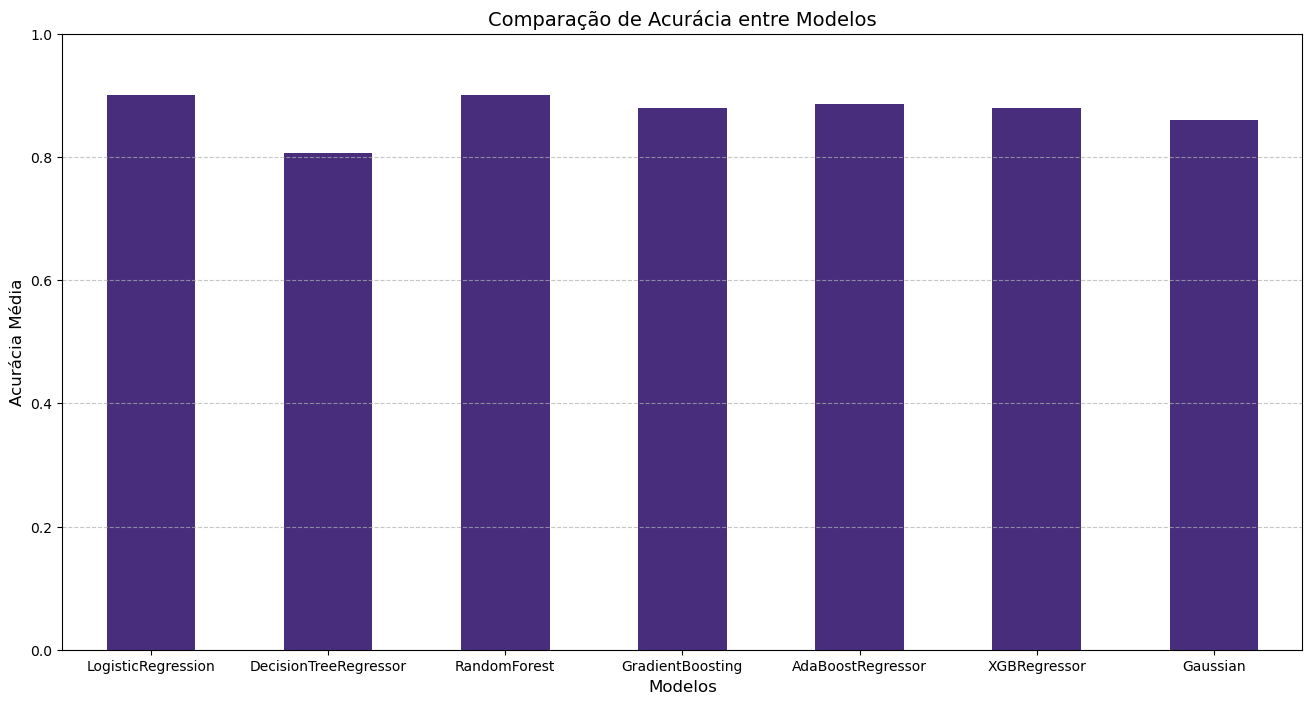

In [25]:
accuracy_df = pd.DataFrame(list(comparacao_accuracy.items()), columns=['Modelo', 'Acurácia'])
accuracy_df.set_index('Modelo', inplace=True)

cores_personalizadas = sns.color_palette("viridis", len(accuracy_df))

accuracy_df.plot(
    kind='bar', 
    color=cores_personalizadas, 
    figsize=(16, 8), 
    legend=False
)
plt.title('Comparação de Acurácia entre Modelos', fontsize=14)
plt.ylabel('Acurácia Média', fontsize=12)
plt.xlabel('Modelos', fontsize=12)
plt.ylim(0, 1)  
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##### Comparação

In [26]:
resultados_consolidados = []

for nome_modelo, modelo in modelos.items():
    df_resultados = apresentar_resultados(modelo, y_train, y_test, dados_escalados=scaled_data)
    df_resultados['Modelo'] = nome_modelo  
    resultados_consolidados.append(df_resultados)

In [27]:
df_resultados_final = pd.concat(resultados_consolidados)

In [28]:
df_resultados_final.reset_index(inplace=True)
df_resultados_final.rename(columns={'index': 'Scaler'}, inplace=True)

In [29]:
df_resultados_final

,Scaler,Acurácia,Precisão,Recall,F1-score,ROC-AUC,Matriz de Confusão,Modelo
0,MaxAbsScaler,0.893333,0.894756,0.893333,0.893409,0.962738,"[[65, 6], [10, 69]]",LogisticRegression
1,MinMaxScaler,0.893333,0.894756,0.893333,0.893409,0.963095,"[[65, 6], [10, 69]]",LogisticRegression
2,RobustScaler,0.906667,0.908089,0.906667,0.906733,0.96773,"[[66, 5], [9, 70]]",LogisticRegression
3,StandardScaler,0.906667,0.908089,0.906667,0.906733,0.964343,"[[66, 5], [9, 70]]",LogisticRegression
4,MaxAbsScaler,0.813333,0.826341,0.813333,0.812635,0.817793,"[[64, 7], [21, 58]]",DecisionTreeRegressor
5,MinMaxScaler,0.793333,0.811447,0.793333,0.791923,0.798805,"[[64, 7], [24, 55]]",DecisionTreeRegressor
6,RobustScaler,0.8,0.81267,0.8,0.799252,0.804421,"[[63, 8], [22, 57]]",DecisionTreeRegressor
7,StandardScaler,0.813333,0.830148,0.813333,0.812268,0.818506,"[[65, 6], [22, 57]]",DecisionTreeRegressor
8,MaxAbsScaler,0.906667,0.90967,0.906667,0.906716,0.958281,"[[67, 4], [10, 69]]",RandomForest
9,MinMaxScaler,0.906667,0.911839,0.906667,0.906667,0.962114,"[[68, 3], [11, 68]]",RandomForest


In [30]:
colunas_comparacao = ['Acurácia', 'Precisão', 'Recall', 'F1-score', 'ROC-AUC']

for col in colunas_comparacao:
    comparacao_valores(df_resultados_final, col)

Melhor resultado para Acurácia:
Scaler                      RobustScaler
Acurácia                        0.906667
Precisão                        0.908089
Recall                          0.906667
F1-score                        0.906733
ROC-AUC                          0.96773
Matriz de Confusão    [[66, 5], [9, 70]]
Modelo                LogisticRegression
Name: 2, dtype: object
Melhor resultado para Precisão:
Scaler                       MinMaxScaler
Acurácia                         0.906667
Precisão                         0.911839
Recall                           0.906667
F1-score                         0.906667
ROC-AUC                          0.962114
Matriz de Confusão    [[68, 3], [11, 68]]
Modelo                       RandomForest
Name: 9, dtype: object
Melhor resultado para Recall:
Scaler                      RobustScaler
Acurácia                        0.906667
Precisão                        0.908089
Recall                          0.906667
F1-score                        